# Ритейл — Оценка эффективности торговых точек

Задача: провести анализ торговых точек, с целью выяснения какие точки, приносят бОльший доход, а также выяснить влияние программы лояльности на прибыльность клиента.

В рамках решения задачи необходимо:
    - определить среднюю выручку для каждого магазина,
    - расчитать среднее количество покупателей по каждой торговой точке,
    - выяснить влияет ли программа лояльности на выручку магазина.

## Материалы
- Презентация (https://yadi.sk/i/iNLrnd3MyL2Kow)
- Дашборд (https://public.tableau.com/profile/kseniia5429#!/vizhome/Retail_15998587594070/Dashboard1?publish=yes)

## 1. Изучение общей информации и предобработка данных

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
retail_dataset = pd.read_csv("retail_dataset.csv")
product_codes = pd.read_csv('product_codes.csv')

def df_info(df):
    display(df.info())
    display(df.describe())
    display(df.isna().sum())
    display(df.head(5))
    print(df.duplicated().sum())

df_info(retail_dataset)
df_info(product_codes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
purchaseid         105335 non-null object
item_ID            105335 non-null object
Quantity           105335 non-null int64
purchasedate       105335 non-null object
CustomerID         69125 non-null float64
ShopID             105335 non-null object
loyalty_program    105335 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


None

,Quantity,CustomerID,loyalty_program
count,105335.000000,69125.000000,105335.000000
mean,7.821218,21019.302047,0.226345
std,327.946695,1765.444679,0.418467
min,-74216.000000,18025.000000,0.000000
25%,0.000000,19544.000000,0.000000
50%,2.000000,20990.000000,0.000000
75%,7.000000,22659.000000,0.000000
max,74214.000000,23962.000000,1.000000


purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
ShopID                 0
loyalty_program        0
dtype: int64

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


1033
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
productID        9969 non-null object
price_per_one    9969 non-null float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


None

,price_per_one
count,9969.000000
mean,19.503697
std,330.880754
min,0.000000
25%,1.250000
50%,2.550000
75%,5.510000
max,16888.020000


productID        0
price_per_one    0
dtype: int64

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


0


In [3]:
#приведем названия столбцов к нижнему регистру
retail_dataset.columns = retail_dataset.columns.str.lower()
#переименуем столбцы
retail_dataset.columns = ['purchase_id', 
                          'product_id', 
                          'quantity', 
                          'purchase_date', 
                          'customer_id', 
                          'shop_id', 
                          'loyalty_program']
product_codes.columns = ['product_id', 'price_per_one']


#удалим дубликаты
data = retail_dataset.merge(product_codes, on='product_id')
print(data.duplicated().sum())
data = data.drop_duplicates()
display(data.head())
display(data.info())
print(data.isnull().sum())

#приведем типы данных к нужному формату
data['purchase_date'] = pd.to_datetime(data['purchase_date'], format='%Y-%m-%d %H:%M:%S')
data['customer_id'] = data['customer_id'].astype(object)
display(data.info())

5499


,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0,1.25
1,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0,3.36
2,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0,0.42
3,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0,1.66
4,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0,1.63


<class 'pandas.core.frame.DataFrame'>
Int64Index: 504954 entries, 0 to 510452
Data columns (total 8 columns):
purchase_id        504954 non-null object
product_id         504954 non-null object
quantity           504954 non-null int64
purchase_date      504954 non-null object
customer_id        311582 non-null float64
shop_id            504954 non-null object
loyalty_program    504954 non-null float64
price_per_one      504954 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 34.7+ MB


None

purchase_id             0
product_id              0
quantity                0
purchase_date           0
customer_id        193372
shop_id                 0
loyalty_program         0
price_per_one           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 504954 entries, 0 to 510452
Data columns (total 8 columns):
purchase_id        504954 non-null object
product_id         504954 non-null object
quantity           504954 non-null int64
purchase_date      504954 non-null datetime64[ns]
customer_id        311582 non-null object
shop_id            504954 non-null object
loyalty_program    504954 non-null float64
price_per_one      504954 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.7+ MB


None

В данных найден 1% дубликатов, дубликаты удалены. Столбец со значениями даты переведен в формат datetime, столбец с id покупателя переведен в формат object. названия столбцов переименованы в более удобные. Также, в данных пропущено 38% id покупателя, восстановить или заменить данные нет возможности, оставим их без измененений, чтобы не терять информацию по чекам и количествам покупок. 

## 2. Исследовательский анализ данных

,quantity,loyalty_program,price_per_one
count,504954.000000,504954.000000,504954.000000
mean,7.592527,0.208375,25.294218
std,158.323606,0.406147,180.052499
min,-74216.000000,0.000000,0.000000
25%,0.000000,0.000000,1.630000
50%,1.000000,0.000000,3.290000
75%,7.000000,0.000000,5.950000
max,74214.000000,1.000000,16888.020000


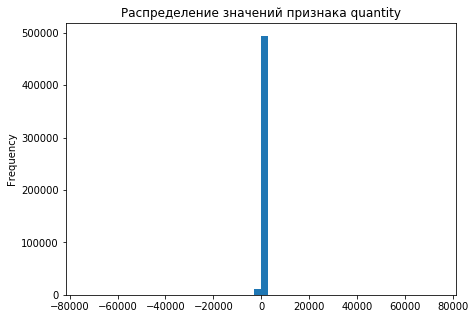

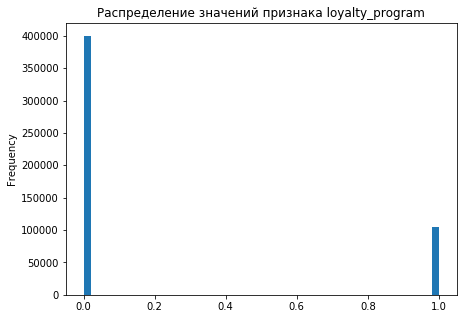

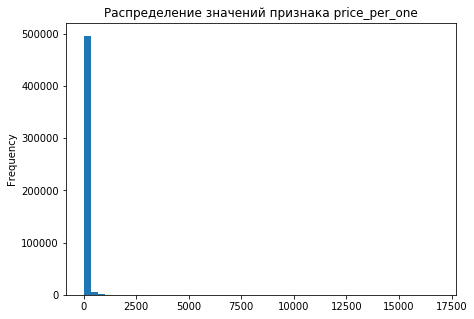

In [4]:
#изучим распределения количественных признаков
display(data.describe())

for column in data.drop(['purchase_id', 'product_id', 'purchase_date', 'customer_id', 'shop_id'],axis=1).columns:
    fig = plt.gcf()
    fig.set_size_inches(7, 5)
    data[column].plot(kind='hist', bins = 50)
    plt.title('Распределение значений признака '+ str(column))
    plt.show()



In [5]:
#в связи с высоким рабросом цен на один и тот же товар заменим цену по каждому товару на медианную
median_price_per_product = data.groupby('product_id')['price_per_one'].median().reset_index()
median_price_per_product.columns = ['product_id', 'median_price']
data = data.merge(median_price_per_product, on='product_id')

#расчитаем выручку по каждому товару 
data['revenue'] = data['quantity'] * data['median_price']
display(data)


,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one,median_price,revenue
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0.0,1.25,1.63,17.93
1,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0.0,3.36,1.63,17.93
2,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0.0,0.42,1.63,17.93
3,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0.0,1.66,1.63,17.93
4,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0.0,1.63,1.63,17.93
...,...,...,...,...,...,...,...,...,...,...
504949,538852,90058B,35,2016-12-14 13:33:00,23051,Shop 0,1.0,0.38,0.38,13.30
504950,539988,46138B,1,2016-12-23 16:06:00,23795,Shop 0,1.0,1.95,1.95,1.95
504951,537025,90053,0,2016-12-03 16:21:00,NaN,Shop 0,0.0,2.55,2.55,0.00
504952,542731,17028J,5,2017-01-31 15:27:00,19279,Shop 0,0.0,0.42,0.42,2.10


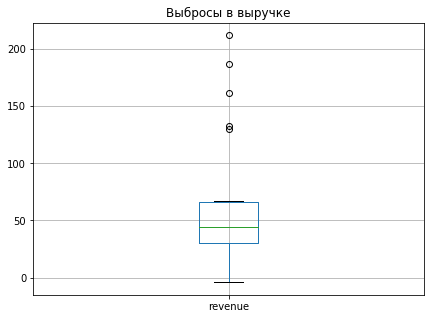

[ 86.975 294.65 ]


,shop_id,purchases
0,Shop 0,4471
25,Shop 4,114
1,Shop 1,90
27,Shop 6,46
4,Shop 12,21
29,Shop 8,20
12,Shop 2,19
2,Shop 10,15
23,Shop 3,15
28,Shop 7,11


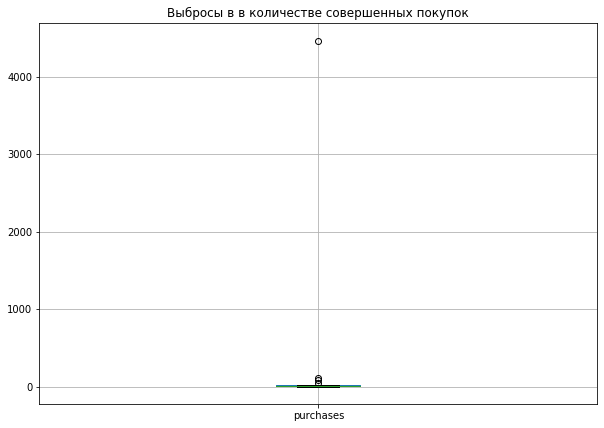

[ 102.  3163.9]


In [6]:
#проанализируем выбросы в выручке
mean_revenue = data.groupby('shop_id').agg({'revenue':'mean'}).reset_index()
mean_revenue.boxplot(figsize=(7, 5))
plt.title('Выбросы в выручке')
plt.show()

#расчитаем 95 и 99 перцентили для выручки    
print(np.percentile(data['revenue'], [95, 99]))

#проанализируем выбросы в количестве совершенных покупок по магазинам
purchasesByShops = data.groupby('shop_id', as_index=False).agg({'purchase_id' : pd.Series.nunique})
purchasesByShops.columns = ['shop_id','purchases']
display(purchasesByShops.sort_values(by='purchases', ascending=False))

purchasesByShops.boxplot(figsize=(10, 7))
plt.title('Выбросы в в количестве совершенных покупок')
plt.show()

#расчитаем 95 и 99 перцентили для количества совершенных покупок по магазинам   
print(np.percentile(purchasesByShops['purchases'], [95, 99]))

Не более 1% выручка составлет 294,65 рублей, не более, чем в 5% магазинах пользователи совершали покупку больше чем 102 раза. 

In [7]:
#избавимся от аномалных выбросов в данных
data = data.query('revenue < 294.65 & shop_id != "Shop 0"')
display(data.head())

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one,median_price,revenue
70,540480,21873,11,2017-01-07 15:27:00,18159,Shop 4,0.0,1.25,1.63,17.93
71,540480,21873,11,2017-01-07 15:27:00,18159,Shop 4,0.0,3.36,1.63,17.93
72,540480,21873,11,2017-01-07 15:27:00,18159,Shop 4,0.0,0.42,1.63,17.93
73,540480,21873,11,2017-01-07 15:27:00,18159,Shop 4,0.0,1.66,1.63,17.93
74,540480,21873,11,2017-01-07 15:27:00,18159,Shop 4,0.0,1.63,1.63,17.93


,shop_id,revenue
16,Shop 24,129.853885
22,Shop 3,117.588670
5,Shop 14,90.980087
11,Shop 2,75.571929
10,Shop 19,71.083140
4,Shop 13,66.993285
14,Shop 22,57.707937
8,Shop 17,55.174101
17,Shop 25,53.581073
23,Shop 30,50.616774


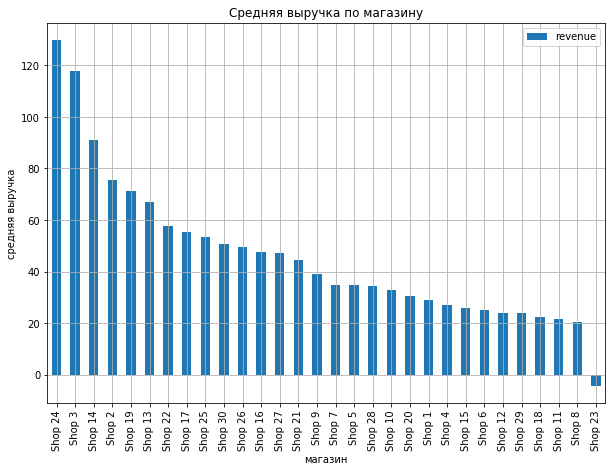

In [8]:
#выведем данные о совершенном дне, неделе и месяце покупки
data['date'] = data['purchase_date'].dt.date
data['week'] = data['purchase_date'].astype('datetime64[W]')
data['month'] = data['purchase_date'].astype('datetime64[M]')

#расчитаем выручку по каждому магазину
revenue_for_shop = data.groupby('shop_id').agg({'revenue':'mean'}).reset_index()\
                       .sort_values(by='revenue', ascending=False)

display(revenue_for_shop)

revenue_for_shop.plot(x='shop_id', 
                      y='revenue',
                      kind = 'bar', 
                      grid=True, 
                      figsize=(10, 7))
plt.title("Средняя выручка по магазину")
plt.xlabel("магазин")
plt.ylabel("средняя выручка")
plt.savefig('mean_revenue_shop.png', format='png', dpi=100)

Наиболее прибыльные магазины 24, 3, и 14, самый убыточный магазин 23 (в данном магазине средняя выручка отрицательная за весь временной период)

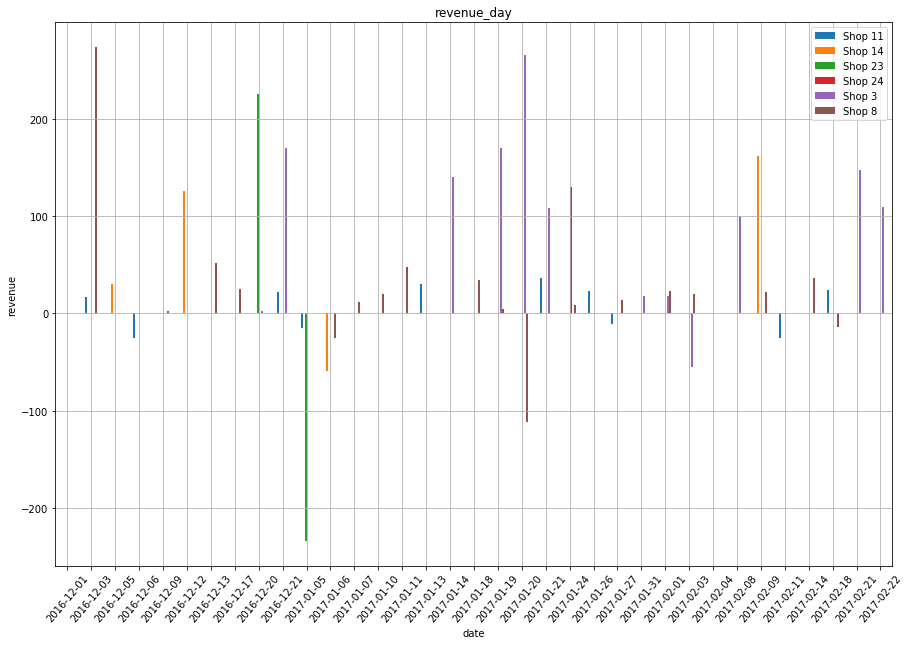

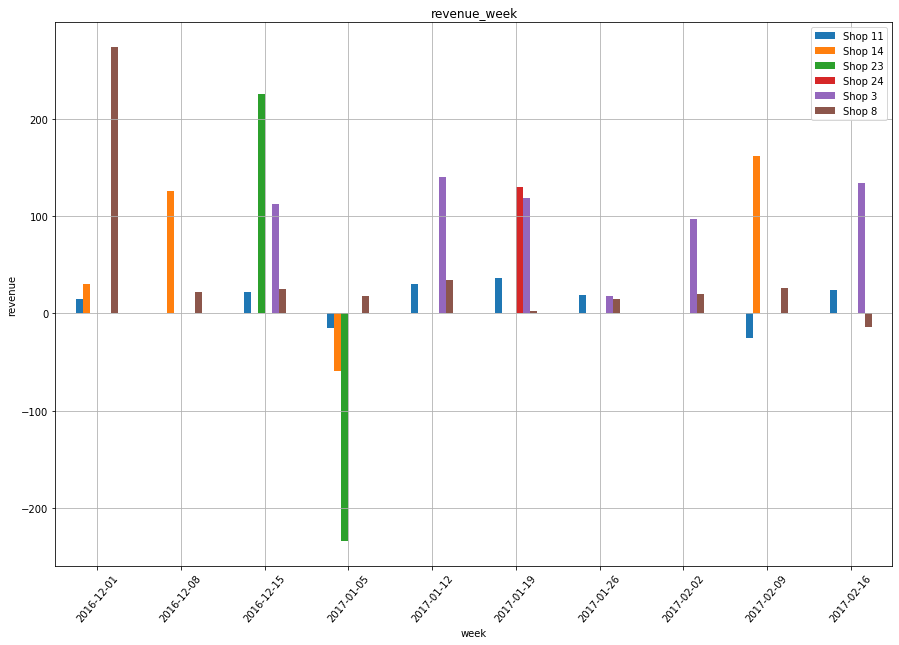

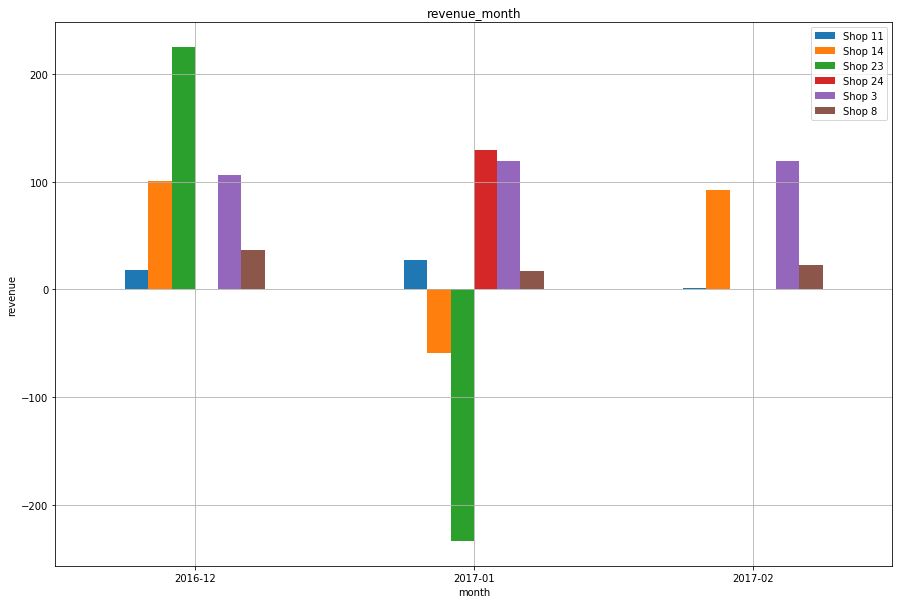

In [9]:
#расчитаем выручку по каждому магазину в день
revenue_day = data.groupby(['shop_id', 'date'])\
                  .agg({'revenue':'mean'}).reset_index()

#выберем топ 3 лучших магазина по выручке и топ 3 худших
lst = ["Shop 24", "Shop 3", "Shop 14", 'Shop 23', "Shop 8", "Shop 11"]
best_worst_shop_revenue_day = revenue_day[revenue_day['shop_id'].isin(lst)].sort_values(by='revenue', ascending=False)

revenue_day = best_worst_shop_revenue_day.pivot_table(index='date', 
                        columns='shop_id',
                        values = 'revenue',
                        aggfunc = 'mean').plot(kind = 'bar', grid=True, figsize=(15, 10))
plt.legend(loc='upper right')
plt.xticks(rotation=50)
plt.title("revenue_day")
plt.xlabel("date")
plt.ylabel("revenue")
plt.savefig('mean_revenue_day.png', format='png', dpi=100)


#расчитаем выручку по каждому магазину в неделю
revenue_week = data.groupby(['shop_id', 'week'])\
                   .agg({'revenue':'mean'}).reset_index()
revenue_week['week'] = revenue_week['week'].dt.strftime('%Y-%m-%d')

lst = ["Shop 24", "Shop 3", "Shop 14", 'Shop 23', "Shop 8", "Shop 11"]
best_worst_shop_revenue_week = revenue_week[revenue_week['shop_id'].isin(lst)].sort_values(by='revenue', ascending=False)
best_worst_shop_revenue_week.pivot_table(index='week', 
                        columns='shop_id',
                        values = 'revenue',
                        aggfunc = 'mean').plot(kind = 'bar', grid=True, figsize=(15, 10))
plt.legend(loc='upper right')
plt.title("revenue_week")
plt.xlabel("week")
plt.ylabel("revenue")
plt.xticks(rotation=50)
plt.savefig('mean_revenue_week.png', format='png', dpi=100)

#расчитаем выручку по каждому магазину в месяц
revenue_month = data.groupby(['shop_id', 'month'])\
                   .agg({'revenue':'mean'}).reset_index()
revenue_month['month'] = revenue_month['month'].dt.strftime('%Y-%m')
lst = ["Shop 24", "Shop 3", "Shop 14", 'Shop 23', "Shop 8", "Shop 11"]
best_worst_shop_revenue_month = revenue_month[revenue_month['shop_id'].isin(lst)].sort_values(by='revenue', ascending=False)
best_worst_shop_revenue_month.pivot_table(index='month', 
                        columns='shop_id',
                        values = 'revenue',
                        aggfunc = 'mean').plot(kind = 'bar', grid=True, figsize=(15, 10))
plt.legend(loc='upper right')
plt.title("revenue_month")
plt.xlabel("month")
plt.ylabel("revenue")
plt.xticks(rotation=0)
plt.savefig('mean_revenue_month.png', format='png', dpi=100)

Несмотря на то, что магазин 14 входит в топ 3 самых прибыльных магазинов, в января 2017 года, у данного магазина была отрицательная выручка. А один из худших магазинов, 11 показал положительную выручку по всем трем месяцам, несмотря на то что в некоторые недели и дни выручка была отрицательная. 

In [10]:
#выручка от покупателей, участвующих в программе лояльности и не участвущих
revenue_loyalty = data.groupby(['customer_id', 'loyalty_program'])\
                      .agg({'customer_id': 'nunique', 'revenue': 'mean'})
revenue_loyalty.columns = ['uniq_customer_count', 'revenue']
revenue_loyalty = revenue_loyalty.reset_index()

display(revenue_loyalty)

revenue_loyalty_0 = revenue_loyalty.query('loyalty_program == "0.0"')
display(revenue_loyalty_0)
display(revenue_loyalty_0['revenue'].mean())

revenue_loyalty_1 = revenue_loyalty.query('loyalty_program == "1.0"')
display(revenue_loyalty_1)
display(revenue_loyalty_1['revenue'].mean())


,customer_id,loyalty_program,uniq_customer_count,revenue
0,18026.0,0.0,1,25.944072
1,18027.0,0.0,1,80.287786
2,18029.0,0.0,1,19.950119
3,18031.0,0.0,1,25.208310
4,18035.0,0.0,1,97.635750
...,...,...,...,...
171,21011.0,0.0,1,66.993285
172,22000.0,0.0,1,13.016667
173,22776.0,1.0,1,3.014751
174,23083.0,1.0,1,102.384041


,customer_id,loyalty_program,uniq_customer_count,revenue
0,18026.0,0.0,1,25.944072
1,18027.0,0.0,1,80.287786
2,18029.0,0.0,1,19.950119
3,18031.0,0.0,1,25.208310
4,18035.0,0.0,1,97.635750
...,...,...,...,...
168,20590.0,0.0,1,27.848473
169,20611.0,0.0,1,14.996024
170,20614.0,0.0,1,226.728571
171,21011.0,0.0,1,66.993285


30.325431377322722

,customer_id,loyalty_program,uniq_customer_count,revenue
173,22776.0,1.0,1,3.014751
174,23083.0,1.0,1,102.384041
175,23508.0,1.0,1,34.479521


46.62610420056333

В среднем выручка покупателей, участвующих в программе лояльности на 34% выше, чем у покупателей, не участвующих в программе лояльности. 

,shop_id,customer_id
24,Shop 4,8593
0,Shop 1,7645
26,Shop 6,3629
28,Shop 8,2607
22,Shop 3,1880
3,Shop 12,1451
27,Shop 7,1444
1,Shop 10,1435
9,Shop 18,1196
11,Shop 2,954


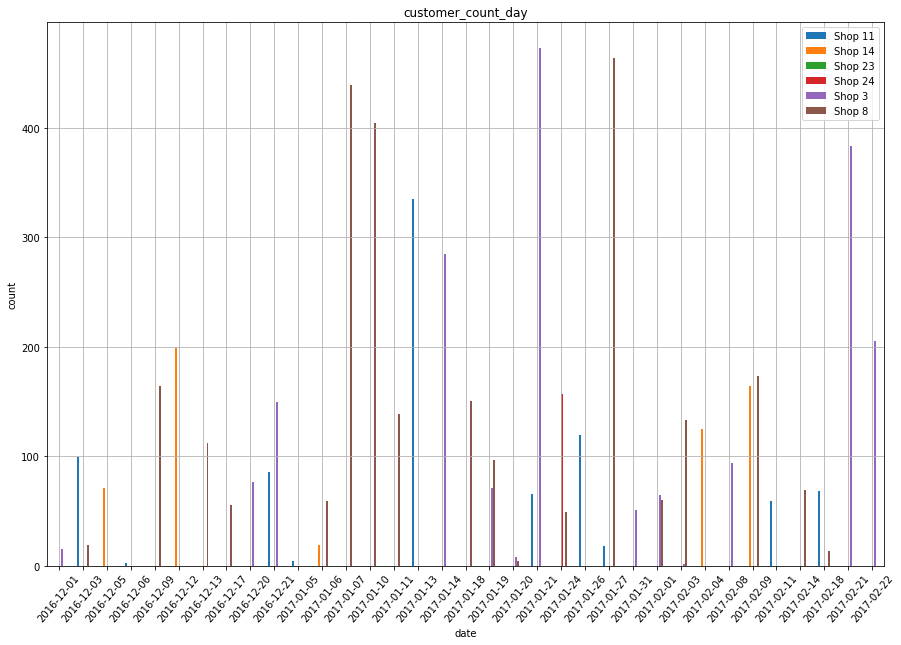

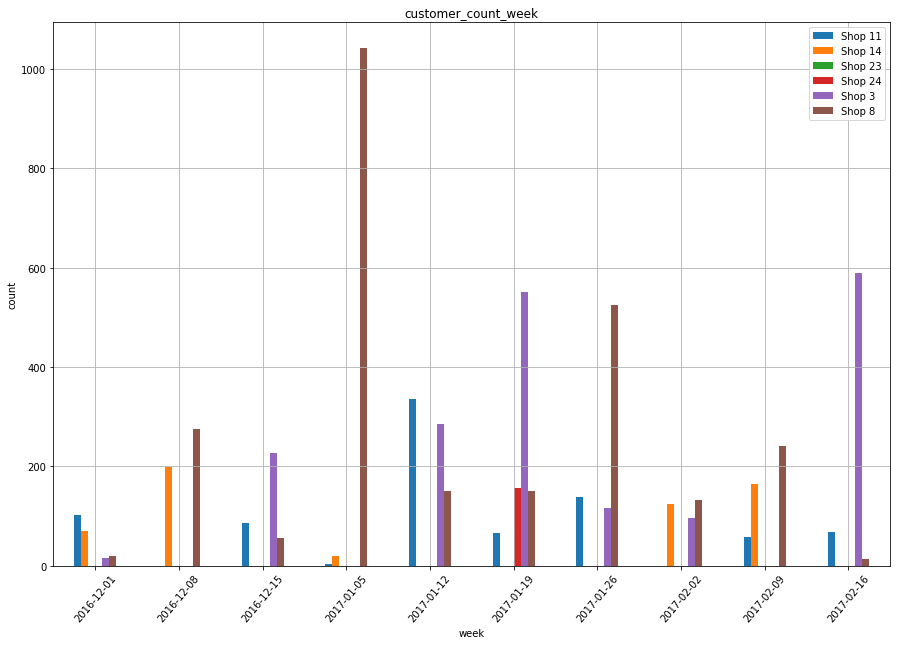

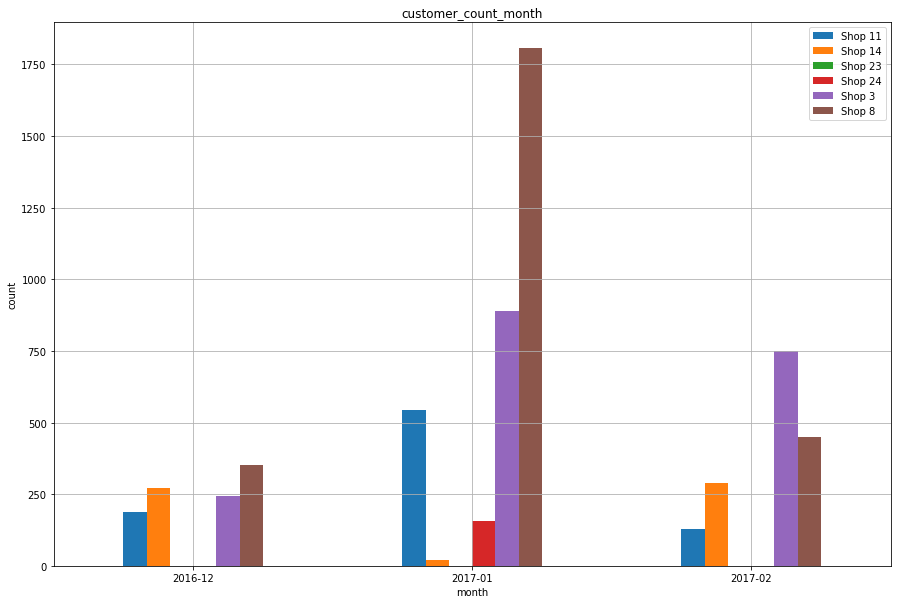

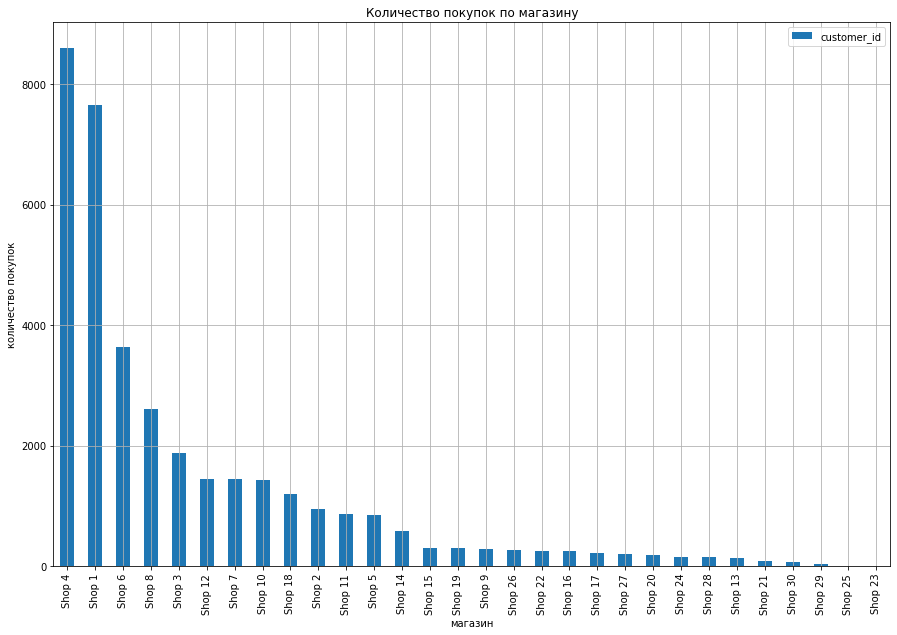

In [11]:
# расчитаем сколько покупателей совершило покупок в день
customer_count_day = data.groupby(['shop_id', 'date'])\
                         .agg({'customer_id':'count'})\
                         .sort_values(by='customer_id', ascending=False).reset_index()

#выберем теже магазины и расчитаем количество покупок по 3м лучшим и 3-м худшим магазинам
lst = ["Shop 24", "Shop 3", "Shop 14", 'Shop 23', "Shop 8", "Shop 11"]
best_worst_shop_customer_day = customer_count_day[customer_count_day['shop_id'].isin(lst)]
best_worst_shop_customer_day.pivot_table(index='date', 
                               columns='shop_id',
                               values = 'customer_id',
                               aggfunc = 'sum').plot(kind = 'bar', grid=True, figsize=(15, 10))
plt.legend()
plt.title("customer_count_day")
plt.xlabel("date")
plt.ylabel("count")
plt.legend(loc='upper right')
plt.xticks(rotation=50)
plt.savefig('customer_count_day.png', format='png', dpi=100)

# расчитаем сколько покупателей совершило покупок в неделю
customer_count_week = data.groupby(['shop_id', 'week'])\
                         .agg({'customer_id':'count'})\
                         .sort_values(by='customer_id', ascending=False).reset_index()
customer_count_week['week'] = customer_count_week['week'].dt.strftime('%Y-%m-%d')
lst = ["Shop 24", "Shop 3", "Shop 14", 'Shop 23', "Shop 8", "Shop 11"]
best_worst_shop_customer_week = customer_count_week[customer_count_week['shop_id'].isin(lst)]
best_worst_shop_customer_week.pivot_table(index='week', 
                               columns='shop_id',
                               values = 'customer_id',
                               aggfunc = 'sum').plot(kind = 'bar', grid=True, figsize=(15, 10))
plt.legend()
plt.title("customer_count_week")
plt.xlabel("week")
plt.ylabel("count")
plt.legend(loc='upper right')
plt.xticks(rotation=50)
plt.savefig('customer_count_week.png', format='png', dpi=100)

# расчитаем сколько покупателей совершило покупок в месяц по магазинам
customer_count_month = data.groupby(['shop_id', 'month'])\
                         .agg({'customer_id':'count'})\
                         .sort_values(by='customer_id', ascending=False).reset_index()
customer_count_month['month'] = customer_count_month['month'].dt.strftime('%Y-%m')
lst = ["Shop 24", "Shop 3", "Shop 14", 'Shop 23', "Shop 8", "Shop 11"]
best_worst_shop_customer_month = customer_count_month[customer_count_month['shop_id'].isin(lst)]
best_worst_shop_customer_month.pivot_table(index='month', 
                               columns='shop_id',
                               values = 'customer_id',
                               aggfunc = 'sum').plot(kind = 'bar', grid=True, figsize=(15, 10))
plt.legend()
plt.title("customer_count_month")
plt.xlabel("month")
plt.ylabel("count")
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.savefig('customer_count_month.png', format='png', dpi=100)


customer_for_shop = data.groupby('shop_id')['customer_id'].count().reset_index()\
                        .sort_values(by='customer_id', ascending=False)
display(customer_for_shop)

customer_for_shop.plot(x='shop_id', 
                       y='customer_id',
                       kind = 'bar', 
                       grid=True, 
                       figsize=(15, 10))
plt.title("Количество покупок по магазину")
plt.xlabel("магазин")
plt.ylabel("количество покупок")
plt.savefig('customer_for_shop.png', format='png', dpi=100)


Наибольшее количество покупок совершают в магазинах 4 и 1, за выбранный временной период ни одной покупки не совершили в магазинах 25 и 23. Несмотря на то, что выручка магазина 24 входит в топ 3 самых больших выручек, количество покупок в данном магазине очень низкое.

In [12]:
#количество покупок участвующих в программе лояльности и не участвущих
customer_loyalty = data.groupby(['customer_id', 'loyalty_program'])\
                      .agg({'customer_id': 'count'})
customer_loyalty.columns = ['customer_count']
customer_loyalty = customer_loyalty.reset_index()

display(customer_loyalty)

customer_loyalty_0 = customer_loyalty.query('loyalty_program == "0.0"')
display(customer_loyalty_0)
display(customer_loyalty_0['customer_count'].mean())

customer_loyalty_1 = customer_loyalty.query('loyalty_program == "1.0"')
display(customer_loyalty_1)
display(customer_loyalty_1['customer_count'].mean())


,customer_id,loyalty_program,customer_count
0,18026.0,0.0,307
1,18027.0,0.0,140
2,18029.0,0.0,84
3,18031.0,0.0,71
4,18035.0,0.0,160
...,...,...,...
171,21011.0,0.0,137
172,22000.0,0.0,45
173,22776.0,1.0,261
174,23083.0,1.0,146


,customer_id,loyalty_program,customer_count
0,18026.0,0.0,307
1,18027.0,0.0,140
2,18029.0,0.0,84
3,18031.0,0.0,71
4,18035.0,0.0,160
...,...,...,...
168,20590.0,0.0,2292
169,20611.0,0.0,83
170,20614.0,0.0,35
171,21011.0,0.0,137


204.82080924855492

,customer_id,loyalty_program,customer_count
173,22776.0,1.0,261
174,23083.0,1.0,146
175,23508.0,1.0,146


184.33333333333334

Количество покупателей, не участвующих в программе лояльности примерно на 10% больше, участвующих.

,first_purchase_week,cohort_lifetime,customer_id
0,2016-12-01,0,32
1,2016-12-01,1,6
2,2016-12-01,2,8
3,2016-12-01,3,2
4,2016-12-01,5,7
...,...,...,...
57,2017-02-09,0,8
58,2017-02-09,1,2
59,2017-02-16,0,9
60,2017-02-16,1,1


cohort_lifetime
0     1.000000
9     0.211770
2     0.182738
3     0.177776
1     0.171735
8     0.162364
5     0.162362
4     0.161920
6     0.159877
12    0.125000
11    0.125000
10    0.115169
7     0.112804
Name: retention, dtype: float64

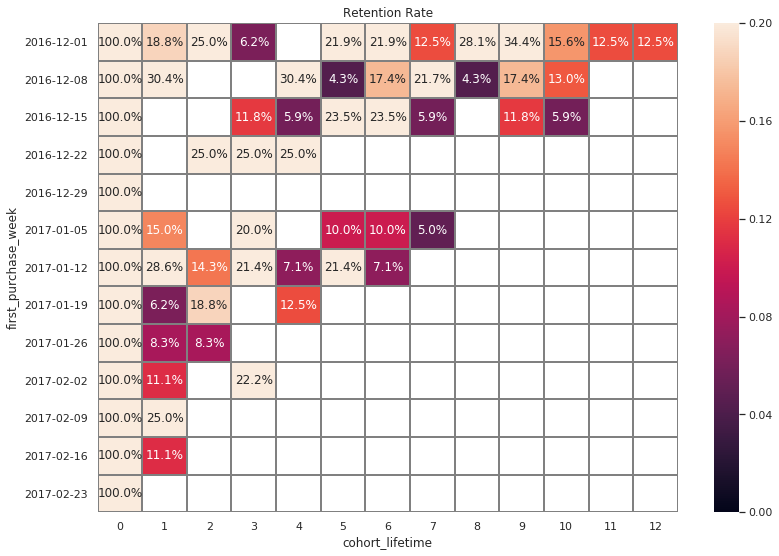

In [13]:
#расчет retention rate (как часто люди возвращаются)
first_purchase_date = data.groupby(['customer_id'])['purchase_date'].min()
first_purchase_date.name = 'first_purchase_date'
data = data.merge(first_purchase_date, on = 'customer_id')

data['first_purchase_week'] = data['first_purchase_date'].astype('datetime64[W]')
data['cohort_lifetime'] = (data['week'] - data['first_purchase_week']) / np.timedelta64(1,'W')
data['cohort_lifetime'] = data['cohort_lifetime'].astype('int')

cohorts = data.groupby(['first_purchase_week','cohort_lifetime']).agg({'customer_id':'nunique'}).reset_index()
display(cohorts)

initial_purchase_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_purchase_week','customer_id']]
initial_purchase_count = initial_purchase_count.rename(columns = {'customer_id':'cohort_customer'})

cohorts = cohorts.merge(initial_purchase_count, on='first_purchase_week')
cohorts['retention'] = cohorts['customer_id'] / cohorts['cohort_customer']
cohorts['first_purchase_week'] = cohorts['first_purchase_week'].dt.strftime('%Y-%m-%d')
retention_pivot = cohorts.pivot_table(index='first_purchase_week',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='sum'
                                     )
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention Rate')
sns.heatmap(retention_pivot, 
            annot=True, 
            fmt='.1%', 
            linewidths=1, 
            linecolor='gray', 
            vmin = 0, vmax= 0.2)
plt.savefig('Retention_rate.png', format='png', dpi=100)
display(cohorts.groupby('cohort_lifetime')['retention'].mean().sort_values(ascending=False))


В первой когорте коэфициент удержания клиентов резко падает с 19 января по 02 февраля 2017г. В половине когорт Retention rate сильно падает в первые 2 недели, но потом клиенты возвращаются.

In [14]:
#расчет retention rate по покупателям, участвущим и не участвующим в программе лояльности
wau_customer_loyalty_program = data.pivot_table(index='week',
                                      columns='loyalty_program',
                                      values='customer_id',
                                      aggfunc='nunique').reset_index()
wau_customer_loyalty_program.columns = ['week', 'not_loyality', 'yes_loyality']
display(wau_customer_loyalty_program)

cohorts = data.groupby(['first_purchase_week','cohort_lifetime']).agg({'customer_id':'nunique'}).reset_index()
display(cohorts)

cohorts_loyalty_program = data.pivot_table(index='first_purchase_week',
                                      columns='loyalty_program',
                                      values='customer_id',
                                      aggfunc='nunique').reset_index()
cohorts_loyalty_program.columns = ['week', 'not_loyality', 'yes_loyality']
display(cohorts_loyalty_program)

cohorts_loyalty_program['retention_1'] = cohorts_loyalty_program['yes_loyality'] / wau_customer_loyalty_program['yes_loyality']
cohorts_loyalty_program['retention_0'] = cohorts_loyalty_program['not_loyality'] / wau_customer_loyalty_program['not_loyality']

display(cohorts_loyalty_program)
print(cohorts_loyalty_program.describe())


,week,not_loyality,yes_loyality
0,2016-12-01,32.0,NaN
1,2016-12-08,27.0,2.0
2,2016-12-15,31.0,1.0
3,2016-12-22,6.0,NaN
4,2016-12-29,1.0,NaN
5,2017-01-05,37.0,NaN
6,2017-01-12,27.0,NaN
7,2017-01-19,32.0,1.0
8,2017-01-26,36.0,1.0
9,2017-02-02,29.0,NaN


,first_purchase_week,cohort_lifetime,customer_id
0,2016-12-01,0,32
1,2016-12-01,1,6
2,2016-12-01,2,8
3,2016-12-01,3,2
4,2016-12-01,5,7
...,...,...,...
57,2017-02-09,0,8
58,2017-02-09,1,2
59,2017-02-16,0,9
60,2017-02-16,1,1


,week,not_loyality,yes_loyality
0,2016-12-01,32.0,NaN
1,2016-12-08,21.0,2.0
2,2016-12-15,17.0,NaN
3,2016-12-22,4.0,NaN
4,2016-12-29,1.0,NaN
5,2017-01-05,20.0,NaN
6,2017-01-12,14.0,NaN
7,2017-01-19,16.0,NaN
8,2017-01-26,12.0,NaN
9,2017-02-02,9.0,NaN


,week,not_loyality,yes_loyality,retention_1,retention_0
0,2016-12-01,32.0,NaN,NaN,1.000000
1,2016-12-08,21.0,2.0,1.0,0.777778
2,2016-12-15,17.0,NaN,NaN,0.548387
3,2016-12-22,4.0,NaN,NaN,0.666667
4,2016-12-29,1.0,NaN,NaN,1.000000
5,2017-01-05,20.0,NaN,NaN,0.540541
6,2017-01-12,14.0,NaN,NaN,0.518519
7,2017-01-19,16.0,NaN,NaN,0.500000
8,2017-01-26,12.0,NaN,NaN,0.333333
9,2017-02-02,9.0,NaN,NaN,0.310345


       not_loyality  yes_loyality  retention_1  retention_0
count     13.000000      2.000000          2.0    13.000000
mean      13.307692      1.500000          1.0     0.568157
std        8.148462      0.707107          0.0     0.236069
min        1.000000      1.000000          1.0     0.310345
25%        9.000000      1.250000          1.0     0.333333
50%       12.000000      1.500000          1.0     0.523810
75%       17.000000      1.750000          1.0     0.666667
max       32.000000      2.000000          1.0     1.000000


В среднем клиенты, участвующие в программе лояльности на 44% чаще возвращаются за покупками.

,purchase_week,n_buyers
0,2016-12-01,32
1,2016-12-08,29
2,2016-12-15,32
3,2016-12-22,6
4,2016-12-29,1
5,2017-01-05,37
6,2017-01-12,27
7,2017-01-19,33
8,2017-01-26,37
9,2017-02-02,29


,first_purchase_week,n_buyers
0,2016-12-01,32
1,2016-12-08,23
2,2016-12-15,17
3,2016-12-22,4
4,2016-12-29,1
5,2017-01-05,20
6,2017-01-12,14
7,2017-01-19,16
8,2017-01-26,12
9,2017-02-02,9


,first_purchase_week,week,customer_id,revenue,n_buyers,age,ltv
0,2016-12-01,2016-12-01,32,121618.75,32,0,3800.585937
1,2016-12-01,2016-12-08,6,46826.28,32,1,1463.321250
2,2016-12-01,2016-12-15,8,25840.80,32,2,807.525000
3,2016-12-01,2016-12-22,2,809.14,32,3,25.285625
4,2016-12-01,2017-01-05,7,26171.26,32,5,817.851875
...,...,...,...,...,...,...,...
57,2017-02-09,2017-02-09,8,20978.81,8,0,2622.351250
58,2017-02-09,2017-02-16,2,-292.29,8,1,-36.536250
59,2017-02-16,2017-02-16,9,34617.31,9,0,3846.367778
60,2017-02-16,2017-02-23,1,-64.78,9,1,-7.197778


age                           0        1        2        3        4        5   \
first_purchase_week                                                             
2016-12-01           3800.585937  5263.91  6071.43  6096.72           6914.57   
2016-12-08           3509.818696  4603.39                    5214.73  5413.56   
2016-12-15           4040.034706                    4000.92  6340.63  10484.4   
2016-12-22           3725.920000            3591.3  4695.95  4671.87            
2016-12-29           3413.370000                                                
2017-01-05           4142.794000   4676.1           5049.26           6327.18   
2017-01-12           4018.820000  4006.35   4028.4  4582.56  4579.72     4682   
2017-01-19           6140.745625   6135.6  6118.93           6532.73            
2017-01-26           2572.520000  2563.42  3578.28                              
2017-02-02           1417.580000  1401.06           1561.27                     
2017-02-09           2622.35

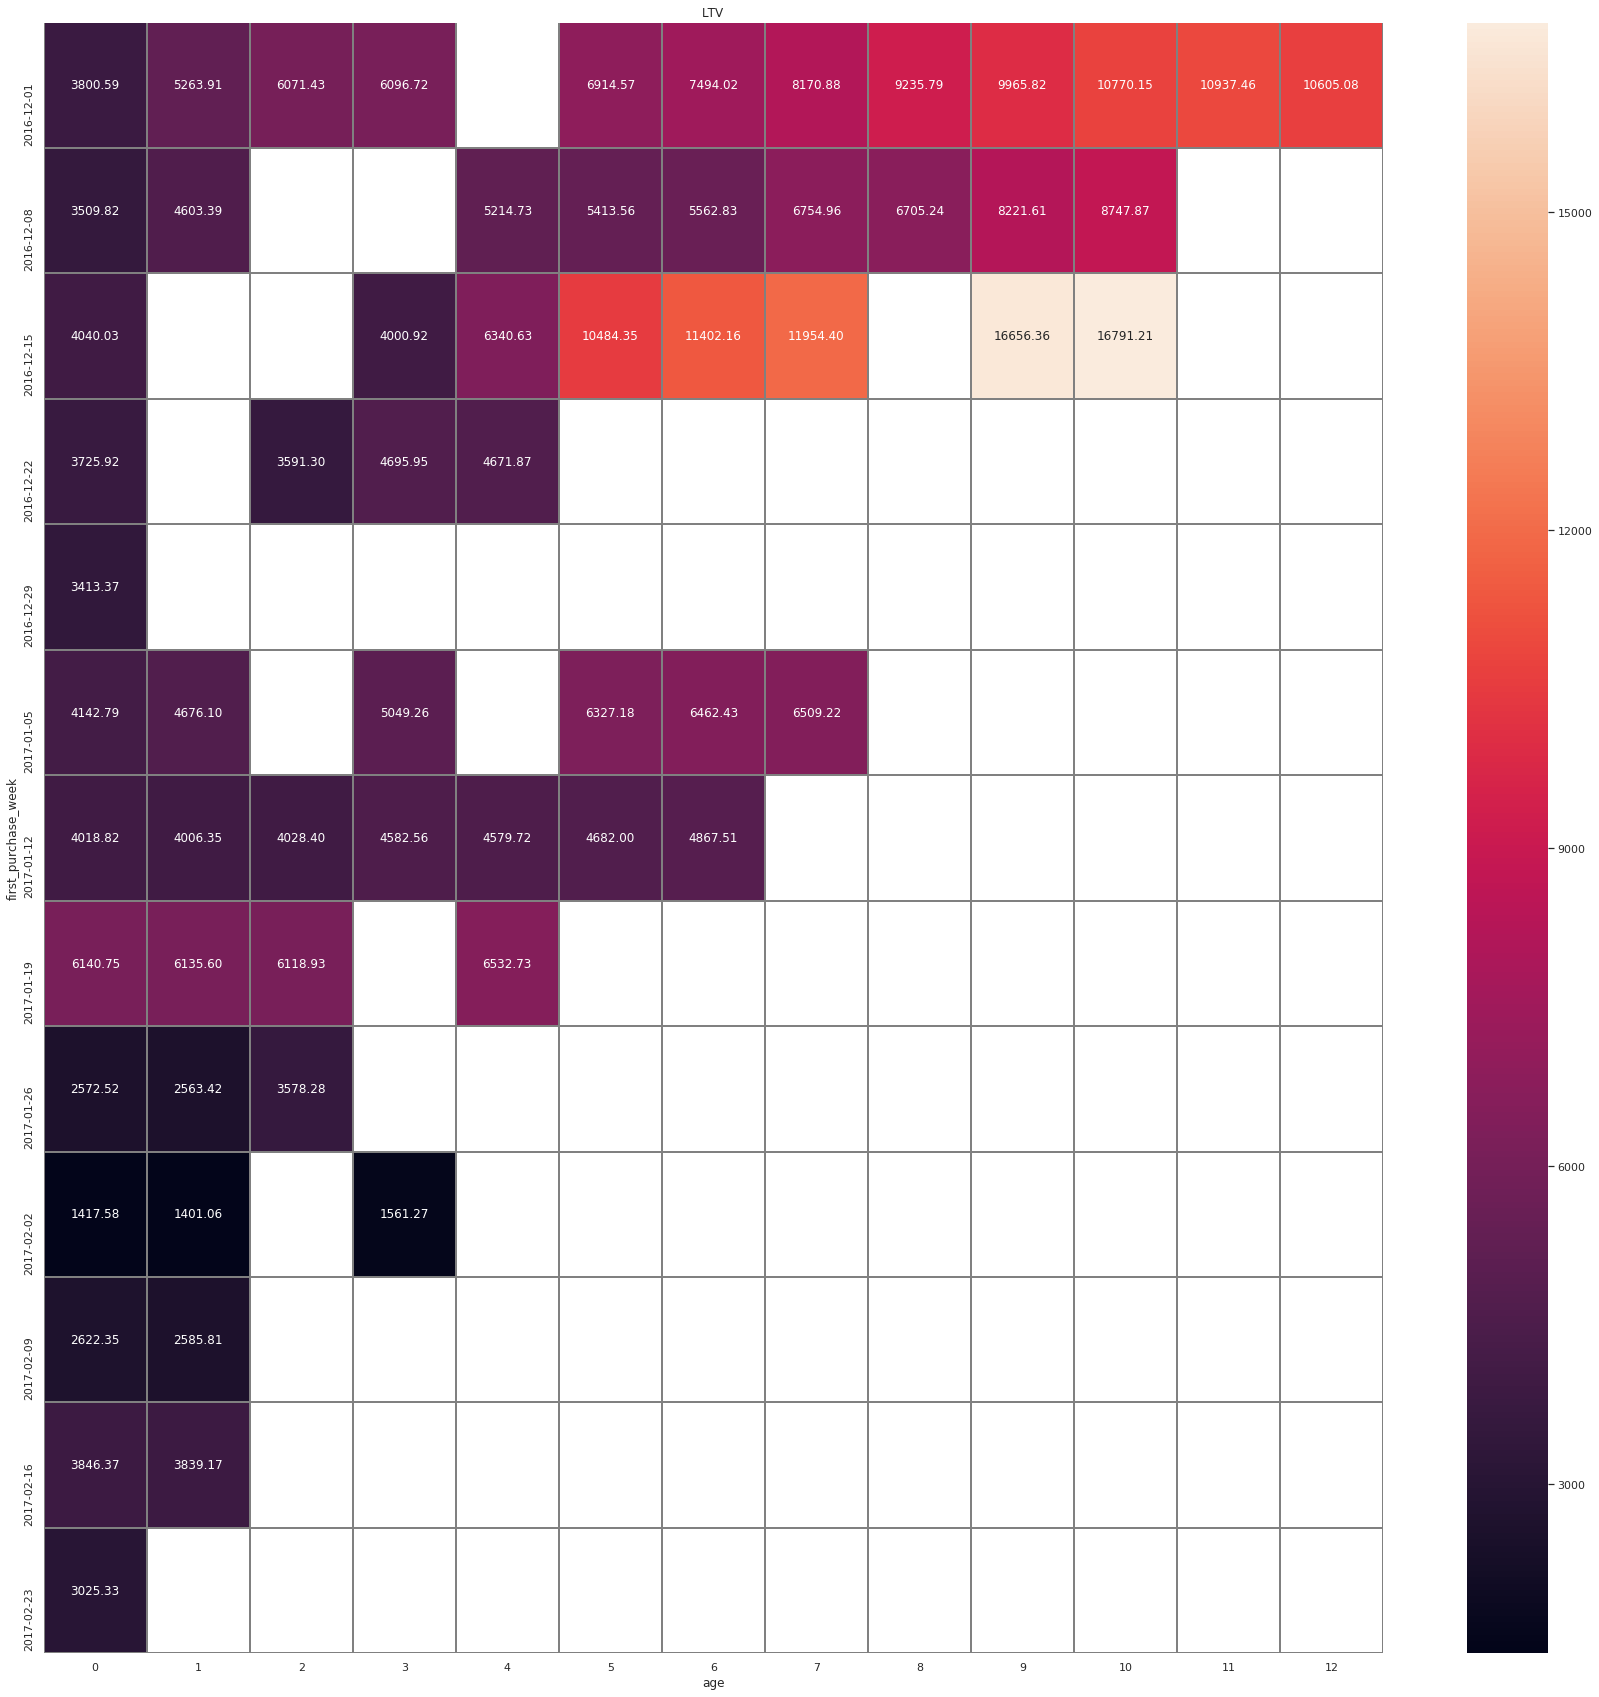

In [15]:
#сгруппируем когорты покупателей по месяцам
buyers_count = data.groupby('week').agg({'customer_id': 'nunique'}).reset_index()
buyers_count.columns = ['purchase_week', 'n_buyers']
display(buyers_count)

#посчитаем количество новых покупателей за каждый месяц
new_buyers_count = data.groupby('first_purchase_week').agg({'customer_id': 'nunique'}).reset_index()
new_buyers_count.columns = ['first_purchase_week', 'n_buyers']
display(new_buyers_count)


#посчитаем количество новых покупателей за каждый месяц
report = data.groupby(['first_purchase_week', 'week'])\
             .agg({'customer_id':'nunique', 'revenue': 'sum'}).reset_index()
report = report.merge(new_buyers_count, on='first_purchase_week')

#расчитаем возраст когорты и ltv
report['age'] = (report['week'] - report['first_purchase_week']) / np.timedelta64(1, 'W')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['revenue'] / report['n_buyers']
display(report)

report['first_purchase_week'] = report['first_purchase_week'].dt.strftime('%Y-%m-%d')    
pivot_report = report.pivot_table(
    index='first_purchase_week', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1)

print(pivot_report.fillna(''))

sns.set(style='white')
plt.figure(figsize=(30, 30))
plt.title('LTV')
sns.heatmap(pivot_report, 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='gray')
plt.savefig('ltv.png', format='png', dpi=100)
print(report['ltv'].mean())

В среднем каждый покупатель за время жизни в когорте приносит прибыль в размере 1237 рублей. 

## 3. Проверка гипотез

Н0 - средняя выручка от клиентов, участвующих в программе лояльности не отличается от средней выручки клиентов, не участвующих в программе лояльности

In [16]:
#выведем среднюю выручку клиентов, участвующих и не участвующих в программе лояльности
display(revenue_loyalty_0)
display(revenue_loyalty_0['revenue'].mean())

display(revenue_loyalty_1)
display(revenue_loyalty_1['revenue'].mean())

#расчитаем дисперсию 
display(np.var(revenue_loyalty_0['revenue'], ddof=1))
display(np.var(revenue_loyalty_1['revenue'], ddof=1))

,customer_id,loyalty_program,uniq_customer_count,revenue
0,18026.0,0.0,1,25.944072
1,18027.0,0.0,1,80.287786
2,18029.0,0.0,1,19.950119
3,18031.0,0.0,1,25.208310
4,18035.0,0.0,1,97.635750
...,...,...,...,...
168,20590.0,0.0,1,27.848473
169,20611.0,0.0,1,14.996024
170,20614.0,0.0,1,226.728571
171,21011.0,0.0,1,66.993285


30.325431377322722

,customer_id,loyalty_program,uniq_customer_count,revenue
173,22776.0,1.0,1,3.014751
174,23083.0,1.0,1,102.384041
175,23508.0,1.0,1,34.479521


46.62610420056333

1367.3279845940588

2579.2185764568326

In [17]:
#проверим гипотезу
alpha = 0.05

results = st.ttest_ind(revenue_loyalty_0['revenue'], revenue_loyalty_1['revenue'], equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  0.6347093761668438
Не получилось отвергнуть нулевую гипотезу


Гипотезу отвергнуть не получилось. Значит различие в средней выручке между покупателями, участвующими в программе лояльности и не участвующими,  не статистически значимо. Значение equal_var выбрано False в виду того, что дисперсии данных совокупностей различны.

Н0 - среднее количество покупателей, участвующих в программе лояльности не отличается от среднего количества покупателей, не участвующих в программе лояльности

In [18]:
#выведем среднее количество покупателей, участвующих и не участвующих в программе лояльности
display(customer_loyalty_0)
display(customer_loyalty_0['customer_count'].mean())

display(customer_loyalty_1)
display(customer_loyalty_1['customer_count'].mean())

#расчитаем дисперсию 
display(np.var(customer_loyalty_0['customer_count'], ddof=1))
display(np.var(customer_loyalty_1['customer_count'], ddof=1))

,customer_id,loyalty_program,customer_count
0,18026.0,0.0,307
1,18027.0,0.0,140
2,18029.0,0.0,84
3,18031.0,0.0,71
4,18035.0,0.0,160
...,...,...,...
168,20590.0,0.0,2292
169,20611.0,0.0,83
170,20614.0,0.0,35
171,21011.0,0.0,137


204.82080924855492

,customer_id,loyalty_program,customer_count
173,22776.0,1.0,261
174,23083.0,1.0,146
175,23508.0,1.0,146


184.33333333333334

75331.24095980643

4408.333333333334

In [19]:
#проверим гипотезу
alpha = 0.05

results = st.ttest_ind(customer_loyalty_0['customer_count'], customer_loyalty_1['customer_count'], equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  0.667601234774067
Не получилось отвергнуть нулевую гипотезу


Гипотезу отвергнуть не получилось. Значит различие в среднем количестве покупателей между покупателями, участвующими в программе лояльности и не участвующими, не статистически значимо. Значение equal_var выбрано False в виду того, что дисперсии данных совокупностей различны.

## 4. Общие выводы и рекомендации

1. Наиболее прибыльные магазины 24, 3, и 14, самый убыточный магазин 23 (в данном магазине средняя выручка отрицательная за весь предоставленный временной период)
2. Наибольшее количество покупок совершают в магазинах 4 и 1, также за выбранный временной период ни одной покупки не совершили в магазинах 25 и 23. При этом выручка в 25 магазине составляет в среднем 53 руб./день
   Таким образом, считаю необходимым проверить 23 магазин на предмет отрицательной выручки и отсутствия покупок.
3. В среднем выручка покупателей, участвующих в программе лояльности на 34% выше, чем у покупателей, не участвующих в программе лояльности.
4. Количество покупателей, не участвующих в программе лояльности примерно на 10% больше, участвующих.
   Проверка статистической значимости показала, что различия между средней выручкой и количсетвом покупок среди покупателей участвующих и не участвующих в программе лояльности статистически НЕ значимо. Следовательно большого лияния программа лояльности не оказывает на выручку и на количесво покупок.
5. Что касается возвращаемости клиентов, то в половине когорт Retention rate сильно падает в первые 2 месяца, однако потом клиенты возвращаются
6. В среднем клиенты, участвующие в программе лояльности на 44% чаще возвращаются за покупками.
   Таким образом, программа лояльности помогает вернуть ушедшего клиена через какое то время. 
7. В среднем каждый покупатель за время жизни в когорте приносит прибыль в размере 1237 рублей. 
